<a href="https://colab.research.google.com/github/gpdrishti/ML/blob/main/Normalized_Matrix_and_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pylab as plt


In [ ]:
rating_cols=["User_ID","Movie_ID","Rating","Timestamp"]

In [ ]:

from google.colab import drive

drive.mount('/content/drive')

path_link = "/content/drive/MyDrive/ratings.dat"
rating_matrix=pd.read_csv(path_link,sep='::',header=None,names=rating_cols,engine='python')

Mounted at /content/drive


In [ ]:
rating_matrix.shape

(1000209, 4)

In [ ]:
rating_cols_1=["User_ID","gender","age","occupation","zipcode"]

In [ ]:
user_matrix=pd.read_csv('/content/drive/MyDrive/users.dat',sep='::',header=None,names=rating_cols_1,engine='python')

In [ ]:
movie_cols=["Movie_Id","Title","Genre"]
movie_matrix=pd.read_csv('/content/drive/MyDrive/movies.dat',sep='::',header=None,names=movie_cols,engine='python',encoding='latin-1')

In [ ]:
movie_matrix

,Movie_Id,Title,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [ ]:
user_matrix.shape

(6040, 5)

In [ ]:
movie_matrix.shape

(3883, 3)

In [ ]:
user_matrix.head()

,User_ID,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
rating_matrix = rating_matrix.rename(columns={'Movie_ID': 'Movie_Id'})


In [ ]:
merged_df = pd.merge(rating_matrix, movie_matrix, on='Movie_Id')

In [ ]:
merged_df.head(10000)

,User_ID,Movie_Id,Rating,Timestamp,Title,Genre
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...
9995,4660,2804,5,963873798,"Christmas Story, A (1983)",Comedy|Drama
9996,4688,2804,5,963618748,"Christmas Story, A (1983)",Comedy|Drama
9997,4700,2804,4,963546649,"Christmas Story, A (1983)",Comedy|Drama
9998,4705,2804,4,963535341,"Christmas Story, A (1983)",Comedy|Drama


In [ ]:
merged_df=merged_df.sort_values(by='User_ID')

In [ ]:
merged_df.head(10000)

,User_ID,Movie_Id,Rating,Timestamp,Title,Genre
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
28501,1,48,5,978824351,Pocahontas (1995),Animation|Children's|Musical|Romance
13819,1,938,4,978301752,Gigi (1958),Musical
51327,1,1207,4,978300719,To Kill a Mockingbird (1962),Drama
31152,1,1721,4,978300055,Titanic (1997),Drama|Romance
...,...,...,...,...,...,...
294371,70,1513,4,977878219,Romy and Michele's High School Reunion (1997),Comedy
616164,70,1804,3,977877185,"Newton Boys, The (1998)",Crime|Drama
4226,70,2355,4,977877777,"Bug's Life, A (1998)",Animation|Children's|Comedy
413761,70,3623,3,977878093,Mission: Impossible 2 (2000),Action|Thriller


In [ ]:
merged_df1 = merged_df.assign(Genre=merged_df['Genre'].str.split('|')).explode('Genre').reset_index(drop=True)

In [ ]:
merged_df=merged_df1

In [ ]:
merged_df.head()

,User_ID,Movie_Id,Rating,Timestamp,Title,Genre
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,48,5,978824351,Pocahontas (1995),Animation
2,1,48,5,978824351,Pocahontas (1995),Children's
3,1,48,5,978824351,Pocahontas (1995),Musical
4,1,48,5,978824351,Pocahontas (1995),Romance


In [ ]:
merged_df.shape

(2101815, 6)

In [ ]:
genre_counts = movie_matrix.groupby('Genre').size().reset_index(name='Number of Movies')

In [ ]:
import pandas as pd

# Extract unique values from the 'Genre' column to use as column names
unique_categories = merged_df['Genre'].unique()

# Create an empty dataframe with columns from unique categories
ratings = pd.DataFrame(columns=unique_categories)


In [ ]:
# Create a pivot table to get the average rating for each user and genre
ratings = merged_df.pivot_table(values='Rating', index='User_ID', columns='Genre', aggfunc='mean')

# Fill NaN values with 0 (for users who didn't watch a particular genre)
#ratings = ratings.fillna(ratings.mean(axis=1), axis=0)

# Display the resulting pivot table
print(ratings)

Genre      Action  Adventure  Animation  Children's    Comedy     Crime  \
User_ID                                                                   
1        4.200000   4.000000   4.111111    4.250000  4.142857  4.000000   
2        3.500000   3.736842        NaN         NaN  3.560000  3.583333   
3        3.956522   4.000000   4.000000    4.000000  3.766667       NaN   
4        4.157895   3.833333        NaN    4.000000       NaN  5.000000   
5        2.612903   3.000000   4.000000    3.833333  3.410714  3.285714   
...           ...        ...        ...         ...       ...       ...   
6036     3.000000   2.987952   3.911765    3.444444  3.203065  3.528302   
6037     3.642857   4.000000   4.000000    3.666667  3.576271  3.833333   
6038     3.000000   4.000000   3.666667    3.000000  3.833333       NaN   
6039     4.000000   4.100000   3.615385    3.529412  3.723077  4.000000   
6040     2.976190   2.818182   3.000000    4.000000  3.274510  3.920000   

Genre    Documentary    

In [ ]:
ratings.head(100)

Genre,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
User_ID,,,,,,,,,,,,,,,,,,
1,4.200000,4.000000,4.111111,4.250000,4.142857,4.000000,NaN,4.428571,4.0,NaN,NaN,4.285714,NaN,3.666667,4.333333,3.666667,5.000000,NaN
2,3.500000,3.736842,NaN,NaN,3.560000,3.583333,NaN,3.898734,3.0,4.000000,3.000000,NaN,3.333333,3.708333,3.588235,3.483871,3.733333,4.333333
3,3.956522,4.000000,4.000000,4.000000,3.766667,NaN,NaN,4.000000,4.5,NaN,2.666667,4.000000,3.000000,3.800000,3.833333,3.800000,4.000000,4.666667
4,4.157895,3.833333,NaN,4.000000,NaN,5.000000,NaN,4.166667,4.5,NaN,4.333333,NaN,NaN,4.000000,3.555556,3.500000,3.333333,4.500000
5,2.612903,3.000000,4.000000,3.833333,3.410714,3.285714,3.666667,3.096154,NaN,4.000000,2.800000,3.333333,3.125000,3.100000,3.066667,2.846154,3.500000,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,3.842105,3.888889,3.400000,3.625000,3.476190,3.666667,NaN,3.723404,4.5,4.000000,NaN,4.000000,3.500000,3.727273,3.833333,3.722222,4.000000,2.666667
97,4.363636,4.545455,4.500000,4.500000,4.476190,4.642857,NaN,4.469697,4.5,4.615385,4.090909,4.500000,4.615385,4.650000,4.250000,4.600000,4.444444,4.000000
98,4.000000,3.500000,NaN,NaN,3.285714,3.500000,NaN,4.625000,NaN,NaN,1.500000,1.000000,4.000000,3.666667,2.666667,3.500000,4.600000,NaN


In [ ]:
null_counts = ratings.isnull().sum()
null_counts

Genre
Action           28
Adventure       146
Animation      1232
Children's      757
Comedy            9
Crime           378
Documentary    3797
Drama             3
Fantasy        1190
Film-Noir      1890
Horror          740
Musical        1286
Mystery         907
Romance          79
Sci-Fi          129
Thriller         51
War             271
Western        1940
dtype: int64

In [ ]:
columns_to_drop = ['Documentary']  # List of columns to drop
ratings.drop(columns=columns_to_drop, inplace=True)


In [ ]:
ratings_filled=ratings.fillna(0)

In [ ]:
ratings_filled

Genre,Action,Adventure,Animation,Children's,Comedy,Crime,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
User_ID,,,,,,,,,,,,,,,,,
1,4.200000,4.000000,4.111111,4.250000,4.142857,4.000000,4.428571,4.00,0.000000,0.000000,4.285714,0.000000,3.666667,4.333333,3.666667,5.000000,0.000000
2,3.500000,3.736842,0.000000,0.000000,3.560000,3.583333,3.898734,3.00,4.000000,3.000000,0.000000,3.333333,3.708333,3.588235,3.483871,3.733333,4.333333
3,3.956522,4.000000,4.000000,4.000000,3.766667,0.000000,4.000000,4.50,0.000000,2.666667,4.000000,3.000000,3.800000,3.833333,3.800000,4.000000,4.666667
4,4.157895,3.833333,0.000000,4.000000,0.000000,5.000000,4.166667,4.50,0.000000,4.333333,0.000000,0.000000,4.000000,3.555556,3.500000,3.333333,4.500000
5,2.612903,3.000000,4.000000,3.833333,3.410714,3.285714,3.096154,0.00,4.000000,2.800000,3.333333,3.125000,3.100000,3.066667,2.846154,3.500000,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,3.000000,2.987952,3.911765,3.444444,3.203065,3.528302,3.505376,3.00,4.058824,2.986486,3.709677,3.411765,3.352459,2.834320,3.142857,3.785714,3.642857
6037,3.642857,4.000000,4.000000,3.666667,3.576271,3.833333,3.877551,4.25,3.444444,4.111111,4.000000,3.692308,3.681818,3.692308,3.705882,4.000000,3.750000
6038,3.000000,4.000000,3.666667,3.000000,3.833333,0.000000,3.888889,0.00,0.000000,2.500000,0.000000,0.000000,4.166667,4.000000,0.000000,4.000000,0.000000


In [ ]:
def normalize_rows(matrix):
    """
    Normalize the rows of a matrix by dividing each row by its Euclidean norm.

    Parameters:
    matrix (numpy.ndarray): The matrix to be normalized.

    Returns:
    numpy.ndarray: The normalized matrix.
    """
    # Calculate the Euclidean norm of each row
    row_norms = np.linalg.norm(matrix, axis=1, ord=2)

    # Normalize each row by dividing it by its Euclidean norm
    normalized_matrix = matrix / row_norms[:, np.newaxis]

    return normalized_matrix

In [ ]:
normalized_matrix = normalize_rows(ratings_filled)

In [ ]:
normalized_matrix

Genre,Action,Adventure,Animation,Children's,Comedy,Crime,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
User_ID,,,,,,,,,,,,,,,,,
1,0.279125,0.265833,0.273217,0.282448,0.275327,0.265833,0.294315,0.265833,0.000000,0.000000,0.284821,0.000000,0.243680,0.287986,0.243680,0.332291,0.000000
2,0.258361,0.275844,0.000000,0.000000,0.262790,0.264513,0.287795,0.221452,0.295270,0.221452,0.000000,0.246058,0.273740,0.264875,0.257171,0.275585,0.319876
3,0.262283,0.265165,0.265165,0.265165,0.249697,0.000000,0.265165,0.298311,0.000000,0.176777,0.265165,0.198874,0.251907,0.254117,0.251907,0.265165,0.309359
4,0.292821,0.269963,0.000000,0.281701,0.000000,0.352126,0.293439,0.316914,0.000000,0.305176,0.000000,0.000000,0.281701,0.250401,0.246488,0.234751,0.316914
5,0.195506,0.224470,0.299293,0.286823,0.255201,0.245848,0.231664,0.000000,0.299293,0.209505,0.249411,0.233823,0.231952,0.229458,0.212959,0.261881,0.299293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,0.213938,0.213079,0.278959,0.245633,0.228419,0.251613,0.249978,0.213938,0.289446,0.212975,0.264547,0.243302,0.239073,0.202123,0.224126,0.269970,0.259782
6037,0.231005,0.253653,0.253653,0.232515,0.226783,0.243084,0.245888,0.269506,0.218423,0.260698,0.253653,0.234141,0.233476,0.234141,0.235002,0.253653,0.237799
6038,0.260257,0.347009,0.318092,0.260257,0.332550,0.000000,0.337370,0.000000,0.000000,0.216881,0.000000,0.000000,0.361468,0.347009,0.000000,0.347009,0.000000


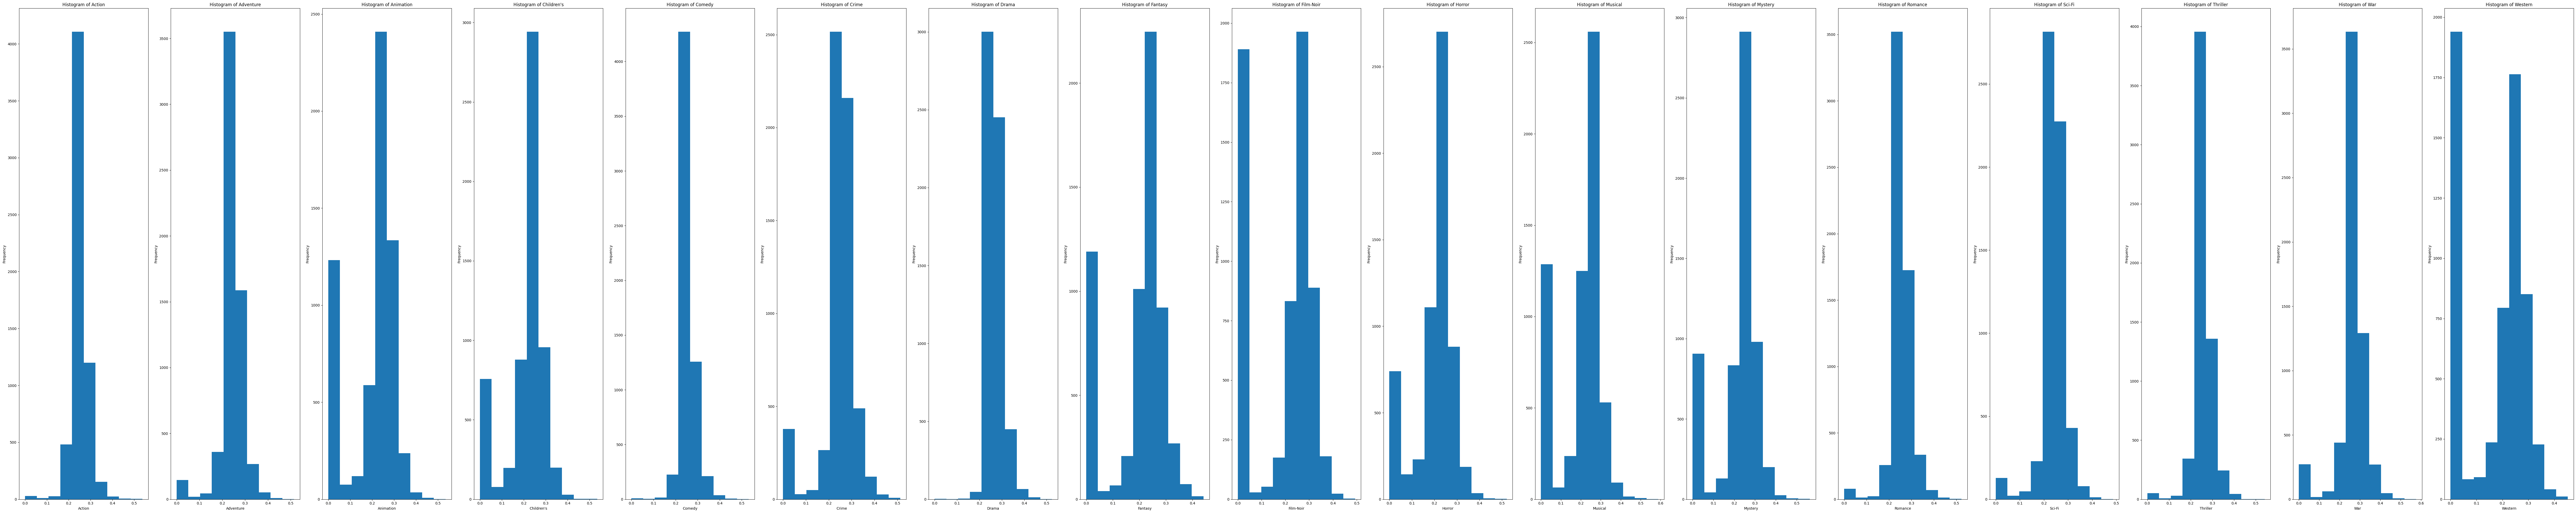

In [ ]:
# Create subplots for each column
fig, axes = plt.subplots(1, len(normalized_matrix.columns), figsize=(100, 20))

# Iterate through each column and create its histogram
for i, col in enumerate(normalized_matrix.columns):
    axes[i].hist(normalized_matrix[col])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Histogram of {col}')

# Tighten layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
#columns_to_drop = ['Film']  # List of columns to drop
#ratings.drop(columns=columns_to_drop, inplace=True)

In [ ]:
ratings_filled=normalized_matrix.fillna(0)

In [ ]:
ratings_filled

Genre,Action,Adventure,Animation,Children's,Comedy,Crime,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
User_ID,,,,,,,,,,,,,,,,,
1,0.279125,0.265833,0.273217,0.282448,0.275327,0.265833,0.294315,0.265833,0.000000,0.000000,0.284821,0.000000,0.243680,0.287986,0.243680,0.332291,0.000000
2,0.258361,0.275844,0.000000,0.000000,0.262790,0.264513,0.287795,0.221452,0.295270,0.221452,0.000000,0.246058,0.273740,0.264875,0.257171,0.275585,0.319876
3,0.262283,0.265165,0.265165,0.265165,0.249697,0.000000,0.265165,0.298311,0.000000,0.176777,0.265165,0.198874,0.251907,0.254117,0.251907,0.265165,0.309359
4,0.292821,0.269963,0.000000,0.281701,0.000000,0.352126,0.293439,0.316914,0.000000,0.305176,0.000000,0.000000,0.281701,0.250401,0.246488,0.234751,0.316914
5,0.195506,0.224470,0.299293,0.286823,0.255201,0.245848,0.231664,0.000000,0.299293,0.209505,0.249411,0.233823,0.231952,0.229458,0.212959,0.261881,0.299293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,0.213938,0.213079,0.278959,0.245633,0.228419,0.251613,0.249978,0.213938,0.289446,0.212975,0.264547,0.243302,0.239073,0.202123,0.224126,0.269970,0.259782
6037,0.231005,0.253653,0.253653,0.232515,0.226783,0.243084,0.245888,0.269506,0.218423,0.260698,0.253653,0.234141,0.233476,0.234141,0.235002,0.253653,0.237799
6038,0.260257,0.347009,0.318092,0.260257,0.332550,0.000000,0.337370,0.000000,0.000000,0.216881,0.000000,0.000000,0.361468,0.347009,0.000000,0.347009,0.000000


In [ ]:
#This function calculates the Eigenvectors corresponding for U matrice
def calculU(M):
    B = np.dot(M, M.T)

    eigenvalues, eigenvectors = np.linalg.eig(B)
    ncols = np.argsort(eigenvalues)[::-1]

    return eigenvectors[:,ncols]

In [ ]:
#This function calculates the Eigenvectors corresponding for V matrice
def calculVt(M):
    B = np.dot(M.T, M)

    eigenvalues, eigenvectors = np.linalg.eig(B)
    ncols = np.argsort(eigenvalues)[::-1]

    return eigenvectors[:,ncols].T

In [ ]:
#Function that calculates Eigenvalues corresponding to the Sigma Matrix
def calculSigma(M):
    if (np.size(np.dot(M, M.T)) > np.size(np.dot(M.T, M))):
        newM = np.dot(M.T, M)
    else:
        newM = np.dot(M, M.T)

    eigenvalues, eigenvectors = np.linalg.eig(newM)
    eigenvalues = np.sqrt(eigenvalues)
    #Sorting in descending order as the svd function does
    return eigenvalues[::-1]

In [ ]:
#Calling the corresponding Fuctions and saving the values in variables
U = calculU(ratings_filled)
Sigma = calculSigma(ratings_filled)
Vt = calculVt(ratings_filled)


In [ ]:
print("-------------------U-------------------")
print(U)
print("\n--------------Sigma----------------")
print(Sigma)
print("\n-------------V transpose---------------")
print(Vt)

-------------------U-------------------
[[-1.23497904e-02+0.j         -1.46028359e-02+0.j
  -2.80218549e-02+0.j         ...  2.56360376e-05+0.00174697j
   2.56360376e-05-0.00174697j -7.63900289e-04+0.j        ]
 [-1.25003146e-02+0.j         -5.23107651e-03+0.j
   2.90771419e-02+0.j         ... -4.67490562e-03-0.00656918j
  -4.67490562e-03+0.00656918j  4.95636064e-03+0.j        ]
 [-1.26949778e-02+0.j          2.36099006e-03+0.j
  -2.27416247e-02+0.j         ...  1.54025457e-03+0.00689007j
   1.54025457e-03-0.00689007j  2.28940380e-03+0.j        ]
 ...
 [-1.09058350e-02+0.j         -2.30999102e-02+0.j
  -2.15440091e-02+0.j         ...  6.02422236e-03-0.009618j
   6.02422236e-03+0.009618j   -1.07936431e-02+0.j        ]
 [-1.35233845e-02+0.j          1.02290539e-02+0.j
   3.89700958e-03+0.j         ...  6.68609654e-03+0.03698906j
   6.68609654e-03-0.03698906j  4.64209938e-02+0.j        ]
 [-1.34125622e-02+0.j          1.32793422e-02+0.j
   2.90802470e-03+0.j         ... -4.52965477e-03-0.

In [ ]:
U.shape

(6040, 6040)

In [ ]:
Sigma.shape

(17,)

In [ ]:
Vt.shape

(17, 17)

In [ ]:
ratings.shape

(6040, 17)

In [ ]:
newSigma = np.zeros((6040,17))
newSigma[:17, :17] = np.diag(Sigma[:17])

print(normalized_matrix,"\n")

A_remake = (U @ newSigma @ Vt)
print(A_remake)


Genre      Action  Adventure  Animation  Children's    Comedy     Crime  \
User_ID                                                                   
1        0.279125   0.265833   0.273217    0.282448  0.275327  0.265833   
2        0.258361   0.275844   0.000000    0.000000  0.262790  0.264513   
3        0.262283   0.265165   0.265165    0.265165  0.249697  0.000000   
4        0.292821   0.269963   0.000000    0.281701  0.000000  0.352126   
5        0.195506   0.224470   0.299293    0.286823  0.255201  0.245848   
...           ...        ...        ...         ...       ...       ...   
6036     0.213938   0.213079   0.278959    0.245633  0.228419  0.251613   
6037     0.231005   0.253653   0.253653    0.232515  0.226783  0.243084   
6038     0.260257   0.347009   0.318092    0.260257  0.332550  0.000000   
6039     0.242853   0.248925   0.219502    0.214282  0.226040  0.242853   
6040     0.199472   0.188882   0.201068    0.268091  0.219466  0.262729   

Genre       Drama   Fant

In [ ]:
# Truncate the user matrix to keep only the first 4 columns
u_new = U[:, :4]

print(u_new.shape)  # This should output (6040, 4)

(6040, 4)


**k means**

In [ ]:
u = pd.DataFrame(u_new)
u = u.apply(np.real)

In [ ]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,40):
    km = KMeans(n_clusters=i)
    km.fit_predict(u)
    wcss.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

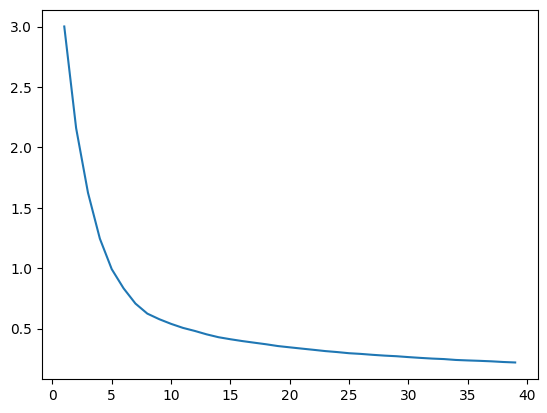

In [ ]:
plt.plot(range(1,40),wcss)

In [ ]:
k=7

In [ ]:
import pandas as pd
import numpy as np

def random_centroids(u, k):
    centroids = []
    for i in range(k):
        centroid = u.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((u - x)**2).sum(axis=1)))
    return distances.idxmin(axis=1)

def new_centroids(u, labels, k):
    return u.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

def kmeans(u, k, max_iterations=300):
    centroids = random_centroids(u, k)
    old_centroids = pd.DataFrame()
    iteration = 1

    while iteration < max_iterations and not centroids.equals(old_centroids):
        old_centroids = centroids
        labels = get_labels(u, centroids)
        centroids = new_centroids(u, labels, k)  # calculate new centroids based on the cluster assignments
        iteration += 1

    return labels.values  # return the array containing the cluster index for each data point

cluster_labels = kmeans(u, k)
print("Cluster Labels:", cluster_labels)


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
/usr/local

Cluster Labels: [0 1 0 ... 0 5 5]


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
/usr/local

In [ ]:
centroids = random_centroids(u,k)

In [ ]:
centroids

,0,1,2,3,4,5,6
0,-0.013560,-0.013513,-0.013470,-0.013490,-0.013575,-0.013315,-0.013544
1,0.007264,0.012121,-0.000005,-0.000615,0.014320,0.003564,-0.011996
2,0.012385,-0.026858,0.023722,-0.000053,0.007927,-0.000254,0.001426
3,0.011450,-0.005826,-0.033689,0.014882,-0.025185,0.006623,0.008013


In [ ]:
cluster_labels

array([0, 1, 0, ..., 0, 5, 5])

In [ ]:
cluster_labels.shape

(6040,)

In [ ]:
np.unique(cluster_labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]),
 array([1485,  197, 1182,  440,  227, 2088,  421]))

In [ ]:
def newUser(R, M, merged_df):
    user_vector = {}

    for i in range(len(R)):
        rating = R[i]
        movie_title = M[i]

        # Assuming 'merged_df' has columns 'Title' and 'Genre'
        # Find all genres for the movie where Title is M[i]
        genres = merged_df.loc[merged_df['Title'] == movie_title, 'Genre'].tolist() if movie_title in merged_df['Title'].values else []

        # Add the rating to the user vector for each genre
        for genre in genres:
            if genre not in user_vector:
                user_vector[genre] = [rating]
            else:
                user_vector[genre].append(rating)

    # Calculate the mean rating for each genre
    mean_user_vector = {}
    for genre, ratings in user_vector.items():
        mean_rating = sum(ratings) / len(ratings) if len(ratings) > 0 else 0
        mean_user_vector[genre] = mean_rating

    return mean_user_vector


In [ ]:
new_user_ratings = [3,4,5]
new_user_movies = ["Two Family House (2000)","Tigerland (2000)","Requiem for a Dream(2000)"]
# new_user_ratings=[]
# new_user_movies=[]
# inpM = "x"
# inpR = 100

# while inpM != "NULL" and inpR != 0:
#     # Take movie name from the user
#     inpM = input("Enter the movie name (type 'NULL' to exit): ")

#     # Check if the user wants to exit
#     if inpM == "NULL":
#         break

#     # Take rating from the user
#     inpR = int(input("Enter the rating (type 0 to exit): "))

#     # Check if the user wants to exit
#     if inpR == 0:
#         break

#     # Append the rating and movie to the respective lists
#     new_user_ratings.append(inpR)
#     new_user_movies.append(inpM)

# Display the collected ratings and movies
print("New User Ratings:", new_user_ratings)
print("New User Movies:", new_user_movies)
# ratings_dict = {}


# newUser(new_user_ratings , new_user_movies ,ratings_dict ,merged_df)
# print(ratings_dict)
# Call the newUser function
mean_user_vector = newUser(new_user_ratings, new_user_movies, merged_df)

# Display the mean user vector
print("Mean User Vector:")
print(mean_user_vector)

New User Ratings: [3, 4, 5]
New User Movies: ['Two Family House (2000)', 'Tigerland (2000)', 'Requiem for a Dream(2000)']
Mean User Vector:
{'Drama': 3.574468085106383}


In [ ]:
def convert_to_vector(mean_user_vector, rating_matrix_genres):
    # Extract genre names from rating matrix and mean_user_vector, and sort them alphabetically
    all_genres = sorted(set(mean_user_vector.keys()).union(rating_matrix_genres))

    # Create a vector with values in the same order as the genres
    vector = [mean_user_vector.get(genre, 0) for genre in all_genres]

    return vector

In [ ]:
row_data = convert_to_vector(mean_user_vector,normalized_matrix)

# Display the resulting row
print("Converted Row:")
print(row_data)

Converted Row:
[0, 0, 0, 0, 0, 0, 3.574468085106383, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
newSigma

array([[2.6456251 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 2.42395269, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 3.17480119, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
newSigma.shape

(6040, 17)

In [ ]:
# Sort the diagonal elements in descending order
sorted_sigma = np.sort(newSigma.diagonal())[::-1]

# Create a new matrix with diagonal elements in decreasing order
sorted_sigma = np.diag(sorted_sigma)

In [ ]:
sorted_sigma

array([[73.12220053,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        , 11.94469948,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , 10.68452978,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  9.11865422,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        

In [ ]:
from numpy.linalg import pinv
sigma_inv = pinv(sorted_sigma)
sigma_inv

array([[0.01367574, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.08371914, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.09359326, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.10966531, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.      

In [ ]:
sigma_inv.shape

(17, 17)

In [ ]:
u_new = row_data
v = Vt.T


In [ ]:
u_final = np.dot(np.dot(u_new, v), sigma_inv)

In [ ]:
u_final

array([-1.38367229e-02,  6.56520479e-02, -9.04513069e-03,  1.22314575e-02,
        2.95339245e-02,  8.08380585e-04, -4.38689891e-02, -8.72953785e-03,
        6.55280081e-03,  3.14787634e-02,  8.23260323e-02, -2.05660278e-01,
        6.01135075e-02, -1.76951369e-01, -5.48268028e-01, -1.61090226e-01,
        1.52497289e+00])

In [ ]:
#take top 13 values
u_final = u_final[:-13]

In [ ]:


def euclidean_distance(vector1, vector2):
    return np.sqrt(np.sum((vector1 - vector2) ** 2))

def assign_to_cluster(new_vector, centroids_df):
    distances = centroids_df.apply(lambda row: euclidean_distance(new_vector, row), axis=1)
    assigned_cluster = distances.idxmin()
    return assigned_cluster

# Example usage:
# Assuming 'new_vector' is the vector you want to assign and 'centroids_df' is your centroid DataFrame

new_vector = np.array(u_final)  # Replace 'your_values_here' with the actual values of your new vector

assigned_cluster = assign_to_cluster(new_vector, centroids.T)
print(f"The new vector is assigned to cluster {assigned_cluster}")




The new vector is assigned to cluster 1


In [ ]:
items_in_cluster = u[cluster_labels == assigned_cluster]

In [ ]:
items_in_cluster

,0,1,2,3
1,-0.012500,-0.005231,0.029077,0.024536
66,-0.012058,-0.004729,0.017889,0.013872
80,-0.013174,0.004709,0.013266,0.010842
81,-0.012578,-0.007942,0.026712,0.022760
124,-0.012537,-0.006689,0.026944,0.024887
...,...,...,...,...
5906,-0.012315,0.003651,0.020573,0.010062
5927,-0.011858,0.011810,0.027673,0.014223
5939,-0.011247,-0.021315,0.021394,0.020697
6018,-0.013125,0.004150,0.015143,0.010759


In [ ]:
items_in_cluster.shape

(197, 4)

In [ ]:
merged_df

,User_ID,Movie_Id,Rating,Timestamp,Title,Genre
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,48,5,978824351,Pocahontas (1995),Animation
2,1,48,5,978824351,Pocahontas (1995),Children's
3,1,48,5,978824351,Pocahontas (1995),Musical
4,1,48,5,978824351,Pocahontas (1995),Romance
...,...,...,...,...,...,...
2101810,6040,904,4,956716845,Rear Window (1954),Mystery
2101811,6040,904,4,956716845,Rear Window (1954),Thriller
2101812,6040,2664,4,957717463,Invasion of the Body Snatchers (1956),Horror
2101813,6040,2664,4,957717463,Invasion of the Body Snatchers (1956),Sci-Fi


In [ ]:
user_ids_list = items_in_cluster.index.tolist()


In [ ]:
user_ids_list

[1,
 66,
 80,
 81,
 124,
 247,
 255,
 288,
 310,
 315,
 334,
 348,
 476,
 525,
 660,
 722,
 757,
 759,
 771,
 873,
 886,
 906,
 916,
 944,
 974,
 1017,
 1037,
 1074,
 1088,
 1098,
 1173,
 1179,
 1261,
 1267,
 1319,
 1341,
 1436,
 1445,
 1454,
 1496,
 1497,
 1519,
 1526,
 1533,
 1566,
 1618,
 1629,
 1641,
 1648,
 1666,
 1681,
 1706,
 1761,
 1774,
 1855,
 1873,
 1931,
 1962,
 1965,
 1971,
 1977,
 2006,
 2033,
 2036,
 2047,
 2050,
 2145,
 2194,
 2242,
 2275,
 2285,
 2296,
 2301,
 2353,
 2372,
 2390,
 2431,
 2436,
 2470,
 2478,
 2486,
 2562,
 2568,
 2585,
 2600,
 2650,
 2668,
 2696,
 2716,
 2731,
 2747,
 2788,
 2810,
 2815,
 2828,
 2889,
 2945,
 3007,
 3023,
 3049,
 3052,
 3084,
 3088,
 3161,
 3170,
 3210,
 3245,
 3256,
 3281,
 3283,
 3287,
 3318,
 3358,
 3363,
 3410,
 3445,
 3451,
 3499,
 3532,
 3540,
 3612,
 3662,
 3676,
 3699,
 3780,
 3811,
 3897,
 3927,
 4045,
 4079,
 4120,
 4128,
 4130,
 4133,
 4147,
 4167,
 4206,
 4218,
 4222,
 4244,
 4330,
 4412,
 4416,
 4476,
 4480,
 4486,
 4493,
 

In [ ]:
rating_matrix.head()

,User_ID,Movie_Id,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [ ]:
movie_matrix

,Movie_Id,Title,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [ ]:
merged_df_final = pd.merge(rating_matrix, movie_matrix, on='Movie_Id')

In [ ]:
# Filter DataFrame to include only users of interest
filtered_df = merged_df_final[merged_df_final['User_ID'].isin(user_ids_list)]

# Group by movie_id and calculate average rating
average_ratings = filtered_df.groupby('Movie_Id')['Rating'].mean().reset_index()

In [ ]:
average_ratings

,Movie_Id,Rating
0,1,4.116667
1,2,3.818182
2,3,3.111111
3,4,3.500000
4,5,3.000000
...,...,...
2856,3948,3.565217
2857,3949,4.333333
2858,3950,4.500000
2859,3951,3.000000


In [ ]:
# Assuming 'movie_ratings' is your DataFrame with columns 'Movie_Id' and 'Rating'
movie_ratings_sorted = average_ratings.sort_values(by='Rating', ascending=False)

# Display the sorted DataFrame
print(movie_ratings_sorted)


      Movie_Id  Rating
2576      3559     5.0
1806      2512     5.0
2497      3456     5.0
806       1162     5.0
805       1161     5.0
...        ...     ...
2457      3407     1.0
2580      3567     1.0
386        496     1.0
1885      2623     1.0
2272      3123     1.0

[2861 rows x 2 columns]


In [ ]:
movie_matrix

,Movie_Id,Title,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [ ]:
movie_matrix[movie_matrix['Movie_Id']==1365]

,Movie_Id,Title,Genre
1344,1365,Ridicule (1996),Drama


In [ ]:
merged_dataframe = pd.merge(rating_matrix, movie_matrix, on='Movie_Id')
merged_dataframe
ratings_movies = merged_dataframe.pivot_table(values='Rating', index='User_ID', columns='Movie_Id')

In [ ]:
rating_matrix

,User_ID,Movie_Id,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648
